In [29]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_cs

# Introduction

Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. Click the blue "Edit Notebook" or "Fork Notebook" button at the top of this kernel to begin editing.

In [24]:
data = pd.read_csv("data.csv", encoding = "unicode_escape")

In [27]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [28]:
# import _locale
# _locale._getdefaultlocale = (lambda *args: ['zh_CN', 'utf8'])

# Exploratory Analysis

To begin this exploratory analysis, first use matplotlib to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made. (Hey, I'm just a kerneling bot, not a Kaggle Competitions Grandmaster!)

In [30]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [51]:
# df = data.head(1000).copy()
# nunique = df.nunique()
# df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
# nRow, nCol = df.shape

### Question 1: How many unique values does each column have?

In [41]:
nunique

InvoiceNo       66
StockCode      590
Description    591
Quantity        44
InvoiceDate     56
UnitPrice       62
CustomerID      48
Country          4
dtype: int64

In [50]:
df1.data

AttributeError: 'DataFrame' object has no attribute 'data'

In [31]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [32]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

Now you're ready to read in the data and use the plotting functions to visualize the data.

In [33]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# data.csv has 541909 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('data.csv', delimiter=',', nrows = nRowsRead, encoding = "unicode_escape")
df1.dataframeName = 'data.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 8 columns


In [52]:
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
995,536520,22469,HEART OF WICKER SMALL,1,12/1/2010 12:43,1.65,14729.0,United Kingdom
996,536520,22100,SKULLS SQUARE TISSUE BOX,1,12/1/2010 12:43,1.25,14729.0,United Kingdom
997,536520,22096,PINK PAISLEY SQUARE TISSUE BOX,1,12/1/2010 12:43,1.25,14729.0,United Kingdom
998,536520,22583,PACK OF 6 HANDBAG GIFT BOXES,1,12/1/2010 12:43,2.55,14729.0,United Kingdom


In [53]:
df = df1.copy()

In [54]:
# filename = df.dataframeName
df = df.dropna('columns') # drop columns with NaN
df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
if df.shape[1] < 2:
    print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
#     return
corr = df.corr()

In [56]:
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,United Kingdom
...,...,...,...,...,...,...
995,536520,22469,1,12/1/2010 12:43,1.65,United Kingdom
996,536520,22100,1,12/1/2010 12:43,1.25,United Kingdom
997,536520,22096,1,12/1/2010 12:43,1.25,United Kingdom
998,536520,22583,1,12/1/2010 12:43,2.55,United Kingdom


In [55]:
corr

,Quantity,UnitPrice
Quantity,1.000000,-0.063277
UnitPrice,-0.063277,1.000000


<ipython-input-30-0121bf3d9d74>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


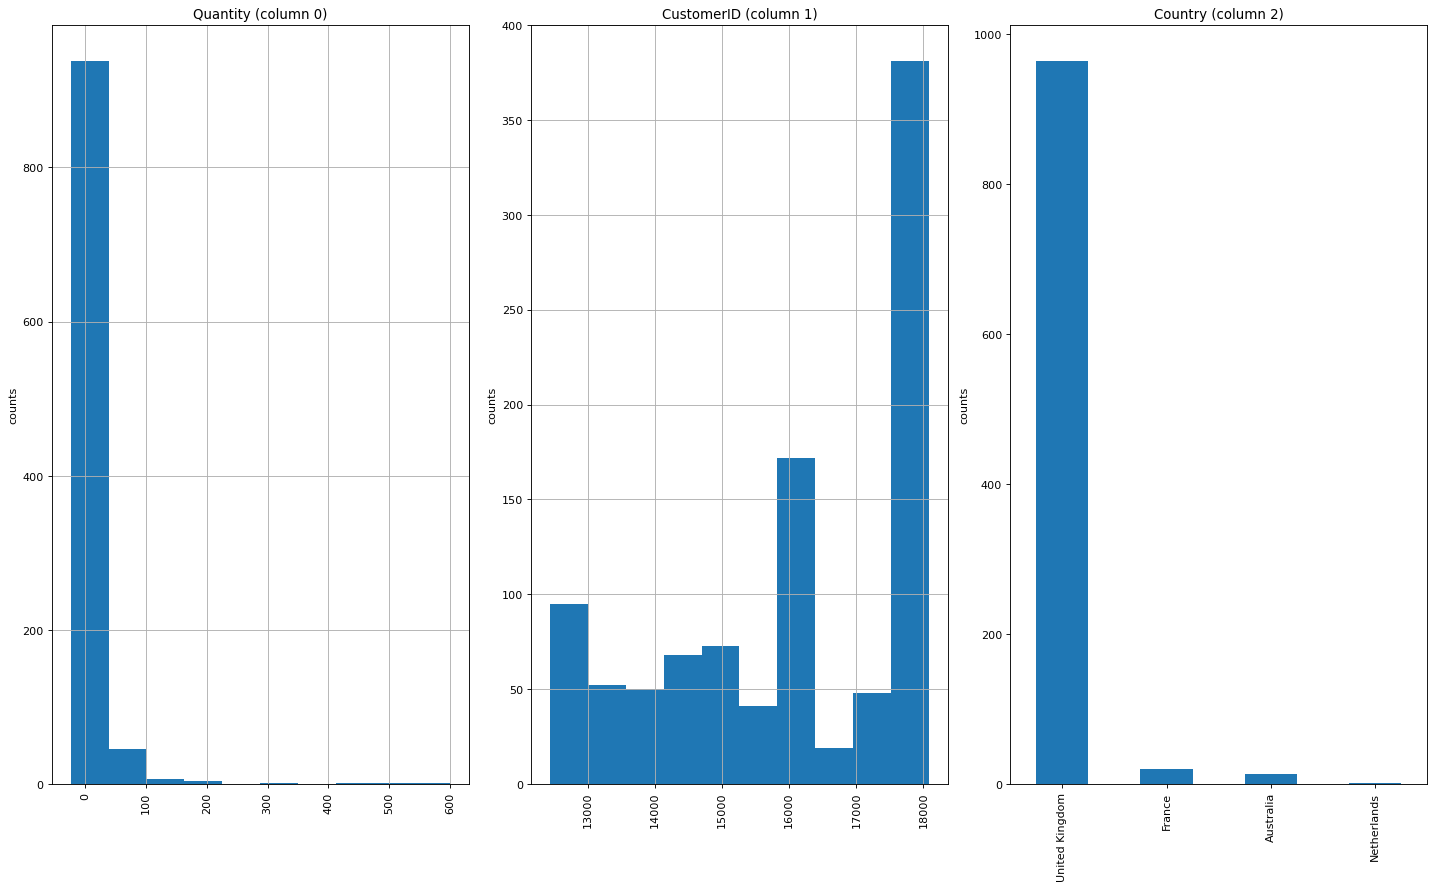

In [35]:
plotPerColumnDistribution(df1, 10, 5)

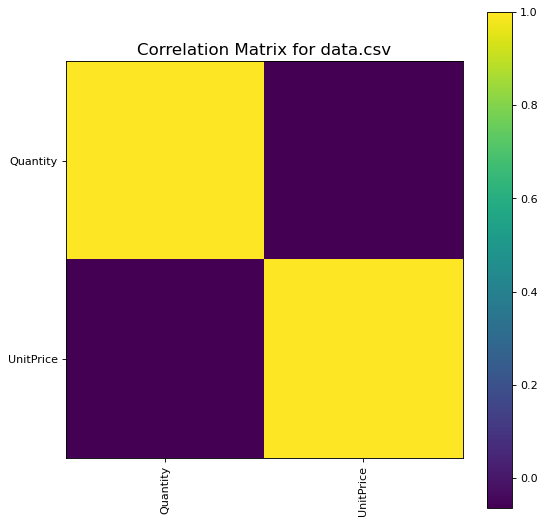

In [36]:
plotCorrelationMatrix(df1, 8)

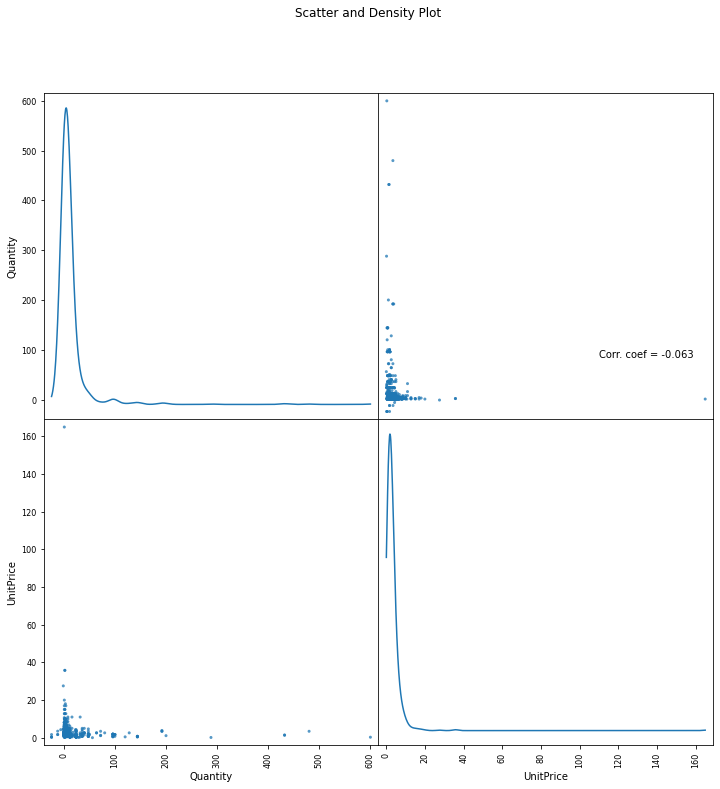

In [37]:
plotScatterMatrix(df1, 12, 10)

# Conclusion

This concludes your starter analysis! To go forward from here, click the blue "Edit Notebook" button at the top of the kernel. This will create a copy of the code and environment for you to edit. Delete, modify, and add code as you please. Happy Kaggling!